# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Dataset lode

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head(4)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0


In [3]:
df.shape

(27, 2)

In [4]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

# visualize the data 

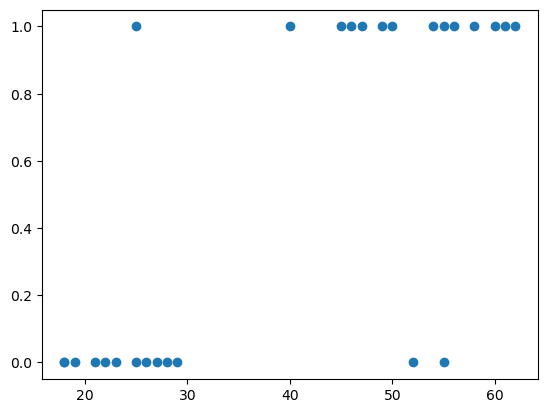

In [5]:
plt.scatter(data=df,x='age',y='bought_insurance')
plt.show()

# Extract columns and Train test split

In [6]:
X = df.iloc[:,:1]
y = df.iloc[:,1]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21, 1), (6, 1), (21,), (6,))

In [8]:
X_train

,age
16,25
17,58
12,27
24,50
1,25
4,46
5,56
2,47
15,55
22,40


In [9]:
y_train

16    1
17    1
12    0
24    1
1     0
4     1
5     1
2     1
15    1
22    1
3     0
25    1
23    1
18    0
26    0
20    0
7     1
10    0
14    1
19    0
6     0
Name: bought_insurance, dtype: int64

# Model train

In [10]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = LR.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [13]:
print(LR.coef_)
print(LR.intercept_)

[[0.11307708]]
[-4.15311919]


# Draw the LogisticRegression Line

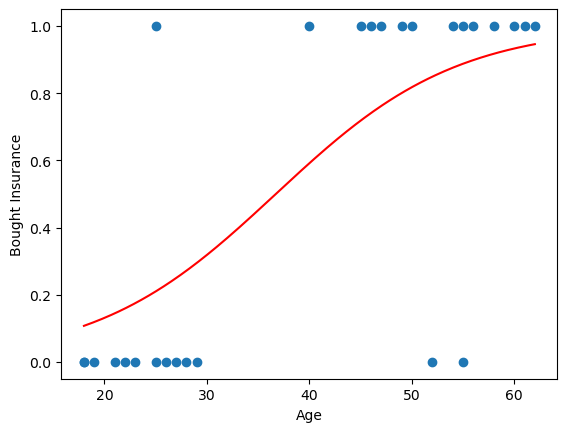

In [14]:
plt.scatter(df['age'], df['bought_insurance'])

#Create a range of ages for smooth plotting
age_range = np.linspace(df['age'].min(), df['age'].max(), 300).reshape(-1,1)

#Predict probabilities for these ages
probs = LR.predict_proba(age_range)[:, 1]

#Plot the sigmoid curve
plt.plot(age_range, probs, color='red')

plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.show()

# Predict

In [15]:
# User input for prediction
user_input = [[36]]  
prediction = LR.predict(user_input)

if prediction[0] == 1:
    print("Prediction: Will buy insurance")
else:
    print("Prediction: Will NOT buy insurance")

Prediction: Will NOT buy insurance


In [16]:
# Save